In [1]:
#importing Libraries
import pandas as pd
import numpy as np

#importing Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loding train Dataset
ds1=pd.read_excel('Final_Train.xlsx')
ds1=pd.DataFrame(ds1)
ds_tr=ds1.copy()

#Loding test Dataset
ds2=pd.read_excel('Final_Test.xlsx')
ds2=pd.DataFrame(ds2)
ds_te=ds2.copy()

In [3]:
#looking at dataset

print(ds_tr.shape)
ds_tr.head()

(5961, 7)


,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


Here we have dataset of 5961 Rows and 7 Columns 

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaeous_Info: Extra information about the doctor

Fees: Fees charged by the doctor

Place: Area and the city where the doctor is located.

In [4]:
#printing number of unique Values

print('Qualification:', ds_tr['Qualification'].nunique())
print('Experience:', ds_tr['Experience'].nunique())
print('Rating:', ds_tr['Rating'].nunique())
print('Place:', ds_tr['Place'].nunique())
print('Profile', ds_tr['Profile'].nunique())

Qualification: 1420
Experience: 64
Rating: 51
Place: 877
Profile 6


In [5]:
#checking info of dataset

ds_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


Here we observe that
Experience feature has to be int64 datatype column but 'Years Experience' making it Object type

Rating feature has to be int64 datatype column but '%' making it Object type

Qualification feature also has their higher education at 0 Index

Place Feature has 2 things, Region And City

and Miscellaneous Info has many entries specially how many people have feedback


# Null Values

In [6]:
#Checking Null Values

#Train Data
print('Train')
print(ds_tr.isnull().sum())
print()

#Test Data
print('Test')
print(ds_te.isnull().sum())

Train
Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Test
Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


# Data Pre-Processing

Removing Years Experience from Experience index

In [7]:
#Train
# split the string into a list 
ds_tr["Experience"] = ds_tr["Experience"].str.split()

#extract the first element of the list and convert it into an integer
ds_tr["Experience"] = ds_tr["Experience"].str[0].astype("int")

#Test
# split the string into a list 
ds_te["Experience"] = ds_te["Experience"].str.split()

#extract the first element of the list and convert it into an integer
ds_te["Experience"] = ds_te["Experience"].str[0].astype("int")

Handeling Missing as well as % sign in Rating Columns

In [8]:
#Replacing NaN with 0%

#Train
ds_tr['Rating'].fillna('0%', inplace=True)

#Test
ds_te['Rating'].fillna('0%', inplace=True)

#Removing % Sign

#Train
ds_tr['Rating']= ds_tr['Rating'].str.replace(r'%', '').astype(int)

#Test
ds_te['Rating']= ds_te['Rating'].str.replace(r'%', '').astype(int)

Handeling Missing as well as seprating cities and Region in Place Columns

In [9]:
#Replacing NaN with Unknown
#Train
ds_tr['Place'].fillna("Unknown,Unknown",inplace=True)

#Test
ds_te['Place'].fillna("Unknown,Unknown",inplace=True)

#Seprating City and Region
#Train
# split the string into a list 
ds_tr["Place"] = ds_tr["Place"].str.split(",")

#Creating a new column ‘City’ and 'Region'
ds_tr["City"] = ds_tr["Place"].str[-1]
ds_tr["Region"] = ds_tr["Place"].str[0]

#Test
# split the string into a list 
ds_te["Place"] = ds_te["Place"].str.split(",")

#Creating a new column ‘City’ and 'Region'
ds_te["City"] = ds_te["Place"].str[-1]
ds_te["Region"] = ds_te["Place"].str[0]

#Dropping Place Feature
#Train
ds_tr=ds_tr.drop(['Place'],axis=1)

#Test
ds_te=ds_te.drop(['Place'],axis=1)

Extracting Degree from Qualification Column

In [10]:
#Train
# split the string into a list 
ds_tr["Qualification"] = ds_tr["Qualification"].str.split(",")

#extract the first element of the list
ds_tr["Degree"] = ds_tr["Qualification"].str[0]

#Test
# split the string into a list 
ds_te["Qualification"] = ds_te["Qualification"].str.split(",")

#extract the first element of the list and convert it into an integer
ds_te["Degree"] = ds_te["Qualification"].str[0]

So Qualification Column is showing 2 things
1. Degree
2. Specialzation 

Now, as we have extracted Degree and We already have Profile Column

we can drop Qualification column

In [11]:
#Dropping Qualification Feature
#Train
ds_tr=ds_tr.drop(['Qualification'],axis=1)

#Test
ds_te=ds_te.drop(['Qualification'],axis=1)

In [12]:
#Describing Dataset

ds_tr.describe()

,Experience,Rating,Fees
count,5961.000000,5961.000000,5961.000000
mean,17.303976,42.217245,307.944640
std,11.142798,47.340934,190.920373
min,0.000000,0.000000,5.000000
25%,9.000000,0.000000,150.000000
50%,14.000000,0.000000,300.000000
75%,23.000000,96.000000,500.000000
max,66.000000,100.000000,950.000000


# Data Analysis

# Univariant

In [13]:
ds_tr

,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Region,Degree
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,BHMS
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,BAMS
2,9,0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,MBBS
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,BSc - Zoology
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,BAMS
...,...,...,...,...,...,...,...,...
5956,19,98,ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Bangalore,Basavanagudi,MBBS
5957,33,0,General Medicine,NaN,100,Chennai,Nungambakkam,MBBS
5958,41,97,General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Delhi,Greater Kailash Part 2,MBBS
5959,15,90,General Medicine,General Medical Consultation Viral Fever Treat...,100,Mumbai,Vileparle West,MBBS


Text(0.5, 1.0, 'Experience')

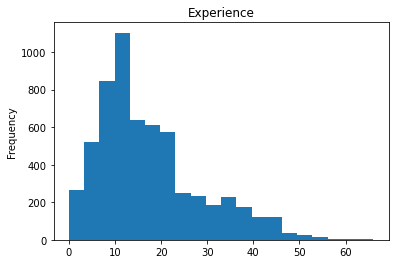

In [14]:
#Checking Freq. distrubtion of Experience Data

ds_tr['Experience'].plot(kind='hist', bins=20)
plt.title("Experience")

we see that most of the doctor have experience of 10-15 year experience

Text(0.5, 1.0, 'Experience')

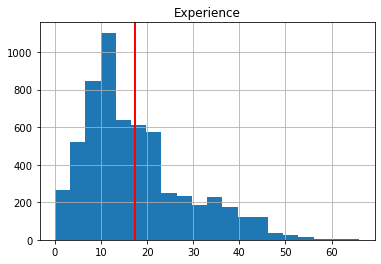

In [15]:
#mean of experience

experience=ds_tr['Experience'].hist(bins=20)
mean_exp=np.mean(ds_tr['Experience'])
plt.axvline(mean_exp, linewidth=2, color='red', label='mean')
plt.title("Experience")

We see that mean is around 18 year experience

Text(0.5, 1.0, 'Rating')

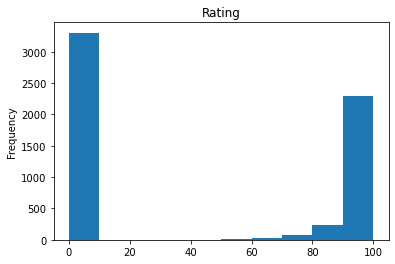

In [16]:
#Checking Freq. distrubtion of Rating Data

ds_tr['Rating'].plot(kind='hist', bins=10)
plt.title("Rating")

We see that most of the doctor has zero rating but we replaced the NaN value with 0

So, we will consider second value, i.e. 90-100

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

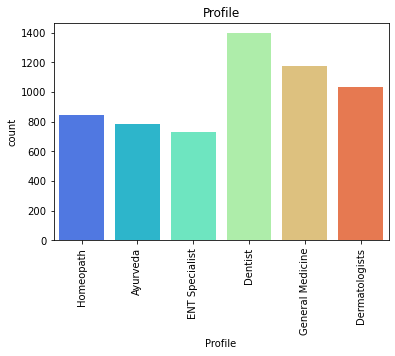

In [17]:
#Plotting countplot of Profile

sns.countplot(ds_tr['Profile'], palette="rainbow")
plt.title("Profile")
plt.xticks(rotation=90)

we see that most of the doctors are dentist while ENT Specialist are least 

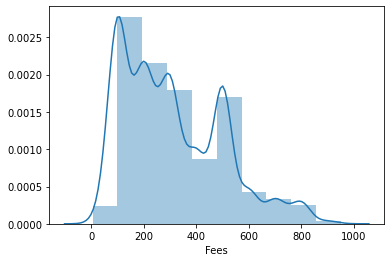

In [18]:
#plotting distplot to analyse Fees
sns.distplot(ds_tr['Fees'], bins=(10))

Most of the doctor has the fees of range 100-200

while less docoters have fees above 600

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

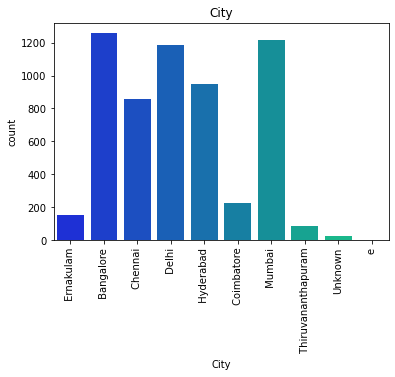

In [19]:
#Plotting countplot of City

sns.countplot(ds_tr['City'], palette="winter")
plt.title("City")
plt.xticks(rotation=90)

We see that most of the doctor are from Metro Cities

In [20]:
#Checking Degree
ds_tr['Degree'].value_counts()

MBBS                                           2448
BDS                                            1208
BAMS                                            711
BHMS                                            706
MD - Dermatology                                 84
                                               ... 
Post Graduate Diploma in Diabetic Education       1
Diploma in Diet and Nutrition                     1
MD - Homeopathy Psychiatry                        1
PhD - Neuropsychology                             1
MRCGP                                             1
Name: Degree, Length: 151, dtype: int64

We see that most of the doctor did the MBBS

# Bivarent Analysis

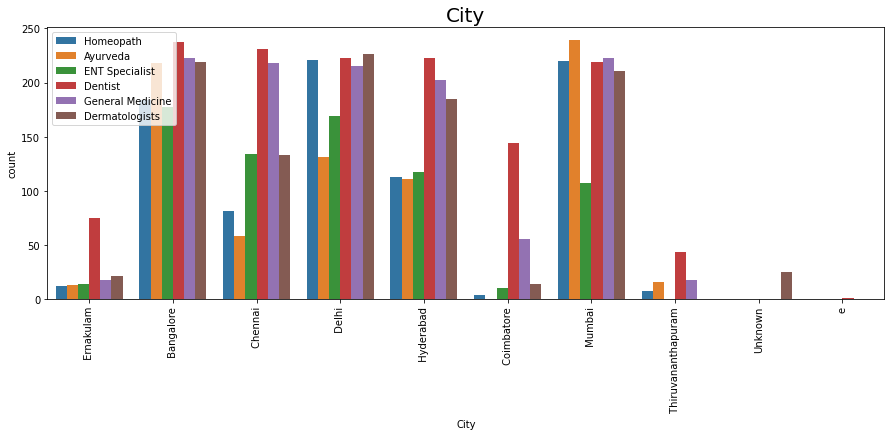

In [21]:
#size of fig.
plt.figure(figsize=(15,5))

#Countplot of City
sns.countplot(x='City', hue='Profile',data=ds_tr)
plt.title('City', fontsize=20)
plt.xticks(rotation=90)
plt.legend()

Observation -

Ernakulam has most of the dentist doctor and least homeopatic.

Bangalore has more dentist and ENT out of all the cities.

In chennai and coimbatore people trust less in ayurveda.

In delhi people prefer homeopathric more then general medicine.

In mumbai people prefer ayurveda than any other type medicine and also mumbai has most number of ayurvedic doctor

Bangalore and Mumbai has most number of General Medicine

Over all best city in terms of availabiltiy of doctor is Bangalore

In [22]:
ds_tr.head()

,Experience,Rating,Profile,Miscellaneous_Info,Fees,City,Region,Degree
0,24,100,Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,BHMS
1,12,98,Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,BAMS
2,9,0,ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,MBBS
3,12,0,Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,BSc - Zoology
4,20,100,Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,BAMS


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

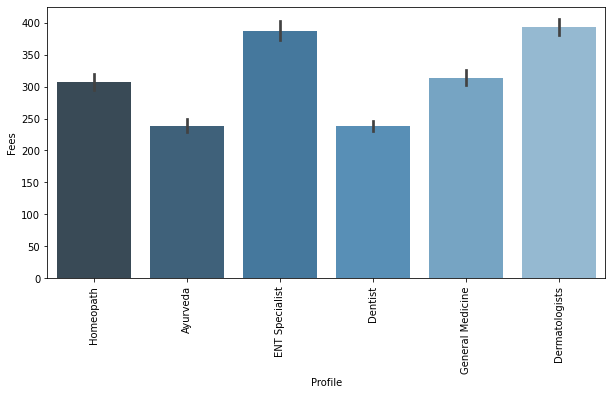

In [23]:
#Plotting bar Graph to compare fees of different profile
plt.figure(figsize=(10,5))
sns.barplot(x='Profile', y='Fees', data=ds_tr, palette="Blues_d")
plt.xticks(rotation=90)

Dermatologist have highest fees while Ayurveic Doctoer has lowest fees

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

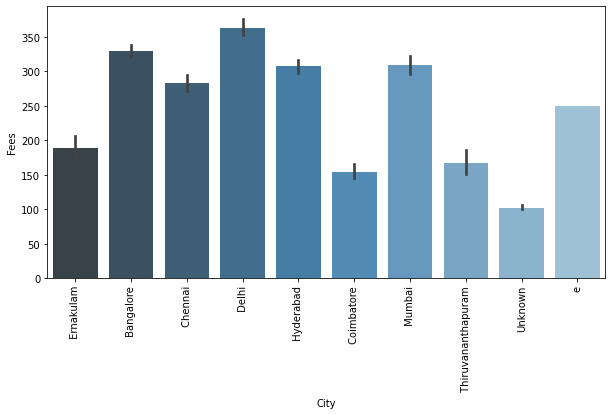

In [24]:
#Plotting bar Graph to compare fees of different state
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Fees', data=ds_tr, palette="Blues_d")
plt.xticks(rotation=90)

Delhi has most highest doctor's fees

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

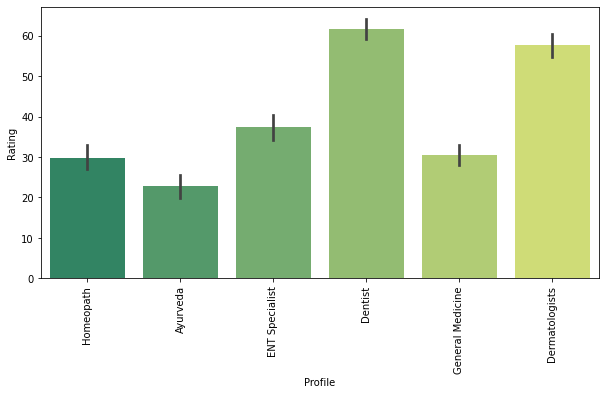

In [25]:
#Plotting bar Graph to compare ratings of different profile
plt.figure(figsize=(10,5))
sns.barplot(x='Profile', y='Rating', data=ds_tr, palette="summer")
plt.xticks(rotation=90)

High Rating Means satisfaction

we see that most of the people are satisfied with the dentist and least satisfy with ayurveda

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

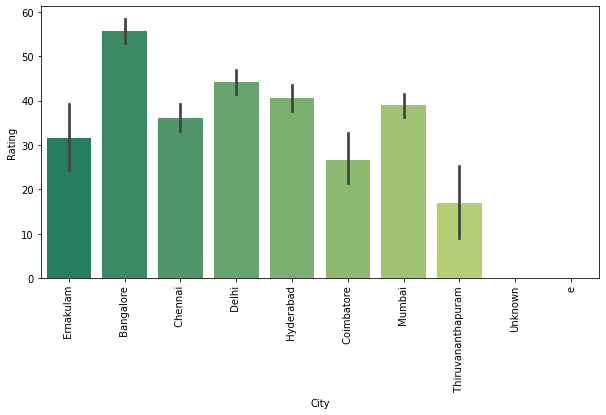

In [26]:
#Plotting bar Graph to compare ratings of different states
plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Rating', data=ds_tr, palette="summer")
plt.xticks(rotation=90)

Banglore has best medical facilites while people of Thiruvananathapuram are lest satisfied

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

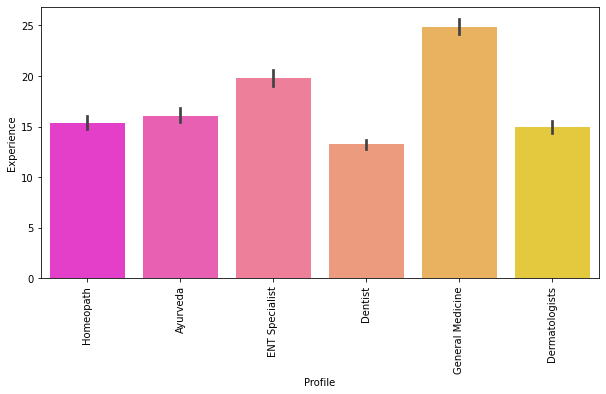

In [27]:
#Plotting bar Graph to compare Experience of different profile
plt.figure(figsize=(10,5))
sns.barplot(x='Profile', y='Experience', data=ds_tr, palette="spring")
plt.xticks(rotation=90)

General Medicine doctors are most experienced while dentist are least experienced

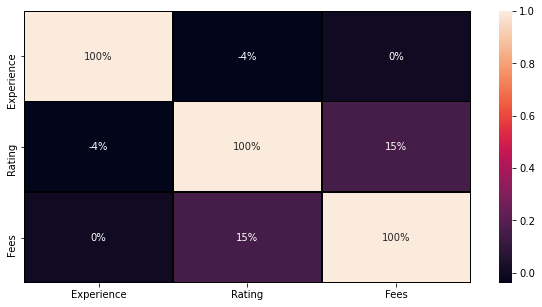

In [29]:
#Correlation Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(ds_tr.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.0%')

we think that experience is most highly releated to fees but we see completely opposite here
and rating is also low releated

# Outliers

Experience       AxesSubplot(0.125,0.536818;0.133621x0.343182)
Rating        AxesSubplot(0.285345,0.536818;0.133621x0.343182)
dtype: object

<Figure size 864x432 with 0 Axes>

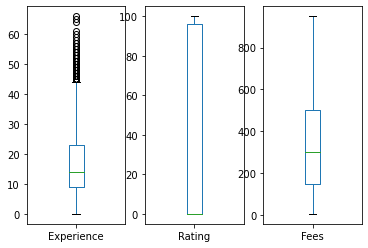

<Figure size 864x432 with 0 Axes>

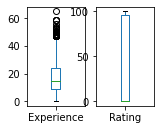

In [30]:
#Plotting Boxplot to see Outliers

#Training Datasets
plt.figure(figsize=(12,6))
ds_tr.plot(kind='box', subplots=True)

#Testing Datasets
plt.figure(figsize=(12,6))
ds_te.plot(kind='box', subplots=True, layout=(2,5))

In [31]:
#importing Zscore Library
from scipy import stats
from scipy.stats import zscore

#Applying Zscore to the columns with outliers
l1=['Experience']
z=abs(zscore(ds_tr[l1]))

#printing all the data with zscore is greater than 3
print(np.where(z>3))

#removing all the rows having zscore greater than 3
ds_tr=ds_tr[(z<3).all(axis=1)]

(array([ 105,  110,  183,  325,  372,  901, 1009, 1111, 1860, 1981, 2023,
       2062, 2202, 2262, 2281, 2631, 3180, 3478, 3493, 3608, 3942, 3960,
       4167, 4212, 4257, 4344, 4763, 4775, 5265, 5277, 5410, 5422, 5587,
       5637, 5664, 5720, 5807, 5942], dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


# Skewness

In [32]:
#Checking Skewness

#Train Data
print('Train')
print(ds_tr.skew())
print()

#Test Data
print('Test')
print(ds_te.skew())

Train
Experience    0.895006
Rating        0.239478
Fees          0.748357
dtype: float64

Test
Experience    0.963447
Rating        0.225321
dtype: float64


Experience feature have skewness

In [33]:
#removing Skewness

#Training dataset
ds_tr['Experience']=np.sqrt(ds_tr['Experience'])
    
#Testing dataset
ds_te['Experience']=np.sqrt(ds_te['Experience'])

# Model Building

In [34]:
#dropping unecessary column
ds_tr=ds_tr.drop(['Miscellaneous_Info'],axis=1)

ds_te=ds_te.drop(['Miscellaneous_Info'],axis=1)

# Encoding

In [35]:
ds_tr.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'City', 'Region', 'Degree'], dtype='object')

In [36]:
#Encoding columns with catagorical data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Label = ['Profile','City','Region', 'Degree']

for i in Label:
    ds_tr[i] = le.fit_transform(ds_tr[i])
    ds_te[i] = le.fit_transform(ds_te[i])

# Standard Scaling

In [37]:
#Normalising
from sklearn.preprocessing import StandardScaler

#Making X and Y variables
x=ds_tr.drop('Fees', axis=1)
y=ds_tr['Fees']

#Standard Scaling
sc=StandardScaler()
x=sc.fit_transform(x)

By looking at the target variable we see that this is a Regression Problem

In [38]:
#ML Models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [39]:
#testing Different Models
model=[LinearRegression(),SVR(), DecisionTreeRegressor(), KNeighborsRegressor(),Lasso(), Ridge(), ElasticNet()]

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print('R2 Score')
    print(r2_score(y_test,pred))
    print('MAE')
    print(mean_absolute_error(y_test,pred))
    print('MSE')
    print(mean_squared_error(y_test,pred))
    print()
    print('..................................................................................................................')

LinearRegression()
0.09160191490211056
R2 Score
0.09589240288626466
MAE
144.3317244628639
MSE
31651.216247782475

..................................................................................................................
SVR()
0.06922412377151932
R2 Score
0.07898031259389937
MAE
140.28412297388488
MSE
32243.278773033366

..................................................................................................................
DecisionTreeRegressor()
0.9934925783249269
R2 Score
-0.6079861102351773
MAE
169.11729957805906
MSE
56292.76455696202

..................................................................................................................
KNeighborsRegressor()
0.35905232582440083
R2 Score
0.040625056833812234
MAE
141.0631223628692
MSE
33586.028793248945

..................................................................................................................
Lasso()
0.09142645829933194
R2 Score
0.0959603267120075
MAE
144.4375234380107
MSE
31648.

In [40]:
lr=LinearRegression()
max_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_score:
        max_score=r2
        final=i
print('max r2 score corrosponding to' ,final ,'is', max_score)

max r2 score corrosponding to 25 is 0.11590108522088727


In [41]:
#Calling Model
le=LinearRegression()

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=27, test_size=0.20)

#fitting Train data in model
le.fit(x_train,y_train)

#Predecting Values
pred=le.predict(x_test)

#printing Matrics
print(le.score(x_train,y_train))
print('R2 Score')
print(r2_score(y_test,pred))
print('MAE')
print(mean_absolute_error(y_test,pred))
print('MSE')
print(mean_squared_error(y_test,pred))
print()

0.09290606039766236
R2 Score
0.09382588606751485
MAE
143.287872653252
MSE
31544.041161323625



# Ensembel Technique

In [42]:
# Imporing ML Models
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor , GradientBoostingRegressor, BaggingRegressor, ExtraTreesRegressor


In [43]:
#testing Different Models
model=[RandomForestRegressor(),AdaBoostRegressor(), GradientBoostingRegressor(), BaggingRegressor(),ExtraTreesRegressor()]

x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print('R2 Score')
    print(r2_score(y_test,pred))
    print('MAE')
    print(mean_absolute_error(y_test,pred))
    print('MSE')
    print(mean_squared_error(y_test,pred))
    print()
    print('..................................................................................................................')

RandomForestRegressor()
0.8778312172335276
R2 Score
0.16392189798500856
MAE
130.75005706248746
MSE
29269.623318498718

..................................................................................................................
AdaBoostRegressor()
0.13741943750342356
R2 Score
0.08126585726597835
MAE
147.54418560611236
MSE
32163.26587535296

..................................................................................................................
GradientBoostingRegressor()
0.2670782447158364
R2 Score
0.16609418843054202
MAE
134.1152101099356
MSE
29193.575252025137

..................................................................................................................
BaggingRegressor()
0.8416440644013397
R2 Score
0.09707269391988183
MAE
136.29597749648383
MSE
31609.896335352147

..................................................................................................................
ExtraTreesRegressor()
0.9933776705735543
R2 Score
0.07349430760247067


In [44]:
#Grid Search 
para= {'n_estimators': [100] , 'criterion': ['friedman_mse', 'mse', 'mae']}

gd=GridSearchCV( estimator=GradientBoostingRegressor() ,param_grid=para ,cv=5)
gd.fit(x,y)
best_para= gd.best_params_
best_score=gd.best_score_
print(best_para)
print(best_score)

{'criterion': 'mse', 'n_estimators': 100}
0.2033838206018813


In [45]:
ge=GradientBoostingRegressor(criterion = 'friedman_mse', n_estimators=100)
max_score=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=i, test_size=0.20)
    ge.fit(x_train,y_train)
    pred=ge.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>max_score:
        max_score=r2
        final=i
print('max r2 score corrosponding to' ,final ,'is', max_score)

max r2 score corrosponding to 93 is 0.23644121118549188


In [50]:
#Calling Model
ge=GradientBoostingRegressor(criterion = 'friedman_mse', n_estimators=100)

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x, y, random_state=93, test_size=0.20)

#fitting Train data in model
ge.fit(x_train,y_train)

#Predecting Values
pred=ge.predict(x_test)

#printing Matrics
print(ge.score(x_train,y_train))
print('R2 Score')
print(r2_score(y_test,pred))
print('MAE')
print(mean_absolute_error(y_test,pred))
print('MSE')
print(mean_squared_error(y_test,pred))
print()

0.26044410233410364
R2 Score
0.23643860269779804
MAE
132.39082999024453
MSE
28319.99911717537



In [51]:
#Cross Valadation
from sklearn.model_selection import cross_val_score
cross_val_score(ge,x,y,cv=5).mean()

0.20316358095580728

In [52]:
#givig test value to final model
pred_fee=ge.predict(ds_te)

In [53]:
#Saving best Model
import joblib
joblib.dump(ge,"doctor.pkl")

['doctor.pkl']